<a href="https://colab.research.google.com/github/Sirisha-collab/Twitter-Sentiment-Analysis/blob/main/LLM_Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install transformers torch sentencepiece
!pip install tweepy
!pip install pandas
!pip install snscrape


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.8/74.8 kB 4.4 MB/s eta 0:00:00


In [14]:
from google.colab import files
import pandas as pd

uploaded = files.upload()  # this opens a file picker

# After selecting your CSV
df = pd.read_csv("twitter_validation.csv", header=None, names=["tweet"])
print(df.head())




Saving twitter_validation.csv to twitter_validation.csv
                                                                       tweet
3364 Facebook  Irrelevant  I mentioned on Facebook that I was struggling ...
352  Amazon    Neutral     BBC News - Amazon boss Jeff Bezos rejects clai...
8312 Microsoft Negative    @Microsoft Why do I pay for WORD when it funct...
4371 CS-GO     Negative    CSGO matchmaking is so full of closet hacking,...
4433 Google    Neutral     Now the President is slapping Americans in the...


In [15]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import numpy as np

model_name = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)


Loading weights:   0%|          | 0/201 [00:00<?, ?it/s]

RobertaForSequenceClassification LOAD REPORT from: cardiffnlp/twitter-roberta-base-sentiment
Key                             | Status     |  | 
--------------------------------+------------+--+-
roberta.embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


In [16]:
def analyze_sentiment(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True)
    outputs = model(**inputs)
    scores = torch.nn.functional.softmax(outputs.logits, dim=1)
    sentiment = ["negative", "neutral", "positive"]
    return sentiment[torch.argmax(scores)]

# Apply to dataframe
df['sentiment'] = df['tweet'].apply(analyze_sentiment)
df.head()

,,,tweet,sentiment
3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...,negative
352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...,neutral
8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...,negative
4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,...",negative
4433,Google,Neutral,Now the President is slapping Americans in the...,negative


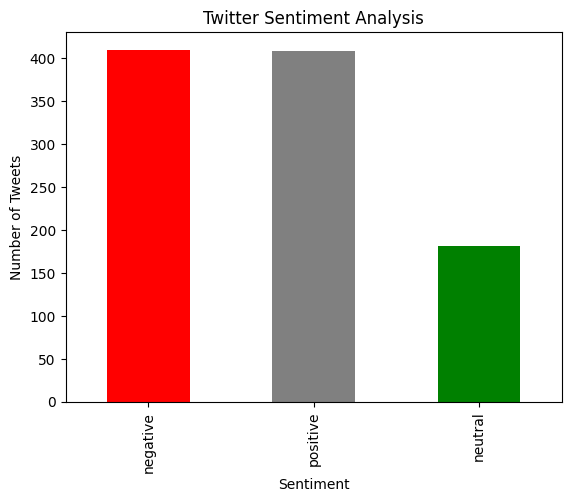

In [17]:
import matplotlib.pyplot as plt

df['sentiment'].value_counts().plot(kind='bar', color=['red', 'gray', 'green'])
plt.title("Twitter Sentiment Analysis")
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")
plt.show()
